In [11]:
import pandas as pd
import swifter
import re
import string
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [12]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stopwords_set = set(stopwords.words('english'))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
df = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding='latin-1', header=None)
df.columns = ['target', 'ids', 'date', 'flag', 'user', 'text']
df = df[['text', 'target']]

df_sample = df.sample(frac=0.1, random_state=42)


In [14]:
df_sample .head(10)

,text,target
541200,@chrishasboobs AHHH I HOPE YOUR OK!!!,0
750,"@misstoriblack cool , i have no tweet apps fo...",0
766711,@TiannaChaos i know just family drama. its la...,0
285055,School email won't open and I have geography ...,0
705995,upper airways problem,0
379611,Going to miss Pastor's sermon on Faith...,0
1189018,on lunch....dj should come eat with me,4
667030,@piginthepoke oh why are you feeling like that?,0
93541,gahh noo!peyton needs to live!this is horrible,0
1097326,@mrstessyman thank you glad you like it! There...,4


In [15]:
df_sample .info()

<class 'pandas.core.frame.DataFrame'>
Index: 160000 entries, 541200 to 427964
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    160000 non-null  object
 1   target  160000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [16]:
df_sample .describe()

,target
count,160000.000000
mean,2.004700
std,2.000001
min,0.000000
25%,0.000000
50%,4.000000
75%,4.000000
max,4.000000


In [17]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    
    tokens = text.split()
    filtered = [word for word in tokens if word not in stopwords_set]
    return ' '.join(filtered)

df_sample['clean_text'] = df_sample['text'].apply(clean_text)


In [18]:

def sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df_sample['sentiment'] = df_sample['clean_text'].apply(sentiment)



In [24]:
print("Comparison Between Original and Cleaned Tweets:\n")
for i in range(7):
    print(f"Original: {df_sample ['text'].iloc[i]}")
    print(f"Cleaned: {df_sample ['clean_text'].iloc[i]}")
    print(f"Predicted Sentiment: {df_sample ['sentiment'].iloc[i]}")
    print("="*60)


Comparison Between Original and Cleaned Tweets:

Original: @chrishasboobs AHHH I HOPE YOUR OK!!! 
Cleaned: ahhh hope ok
Predicted Sentiment: Positive
Original: @misstoriblack cool , i have no tweet apps  for my razr 2
Cleaned: cool tweet apps razr
Predicted Sentiment: Positive
Original: @TiannaChaos i know  just family drama. its lame.hey next time u hang out with kim n u guys like have a sleepover or whatever, ill call u
Cleaned: know family drama lamehey next time u hang kim n u guys like sleepover whatever ill call u
Predicted Sentiment: Negative
Original: School email won't open  and I have geography stuff on there to revise! *Stupid School* :'(
Cleaned: school email wont open geography stuff revise stupid school
Predicted Sentiment: Negative
Original: upper airways problem 
Cleaned: upper airways problem
Predicted Sentiment: Neutral
Original: Going to miss Pastor's sermon on Faith... 
Cleaned: going miss pastors sermon faith
Predicted Sentiment: Negative
Original: on lunch....dj s

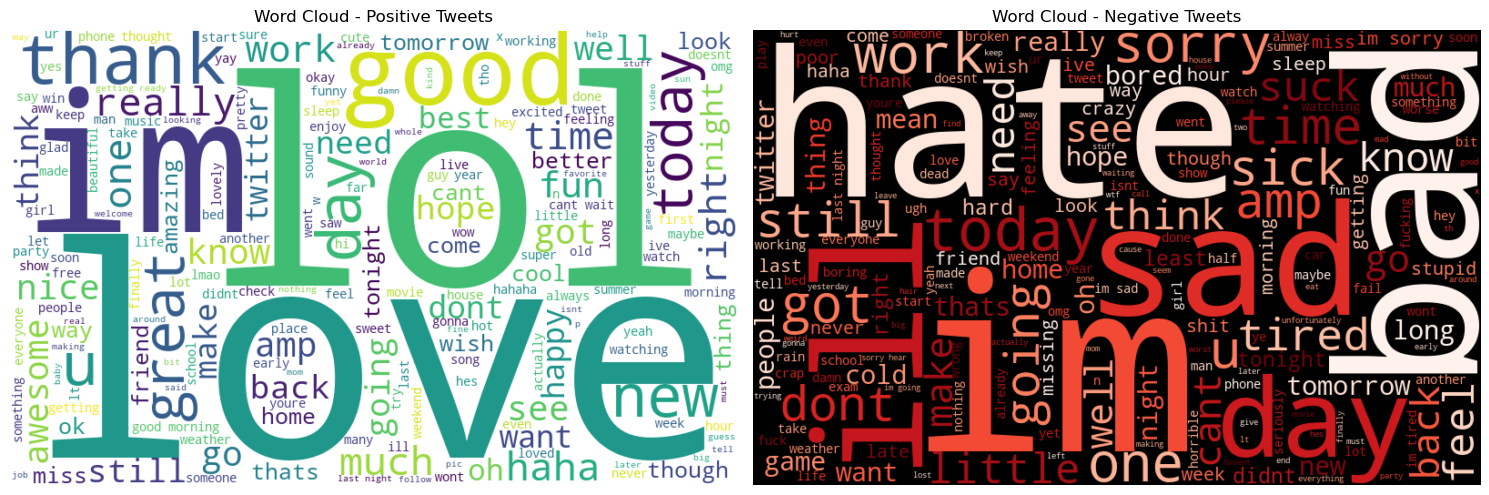

In [21]:
positive_text = ' '.join(df_sample [df_sample ['sentiment'] == 'Positive']['clean_text'].sample(10000, random_state=42))
negative_text = ' '.join(df_sample [df_sample ['sentiment'] == 'Negative']['clean_text'].sample(10000, random_state=42))

plt.figure(figsize=(15,7))

plt.subplot(1, 2, 1)
wordcloud_pos = WordCloud(width=800, height=500, background_color='white').generate(positive_text)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Positive Tweets")

plt.subplot(1, 2, 2)
wordcloud_neg = WordCloud(width=800, height=500, background_color='black', colormap='Reds').generate(negative_text)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Negative Tweets")

plt.tight_layout()
plt.show()

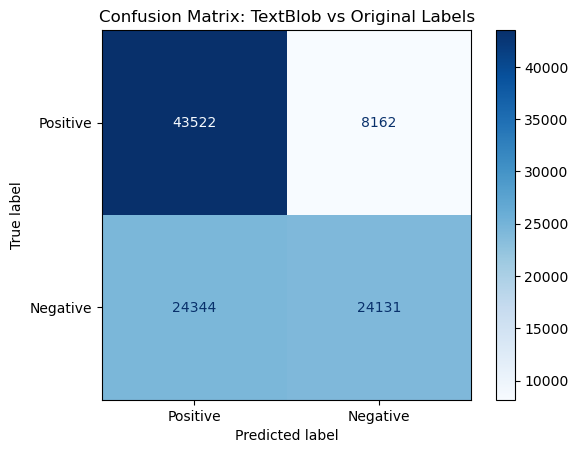

In [22]:
df_sample  = df_sample [df_sample ['target'].isin([0, 4])]
df_sample ['true_sentiment'] = df_sample ['target'].map({0: 'Negative', 4: 'Positive'})
cm = confusion_matrix(df_sample ['true_sentiment'], df_sample ['sentiment'], labels=['Positive', 'Negative'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Positive', 'Negative'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: TextBlob vs Original Labels')
plt.show()

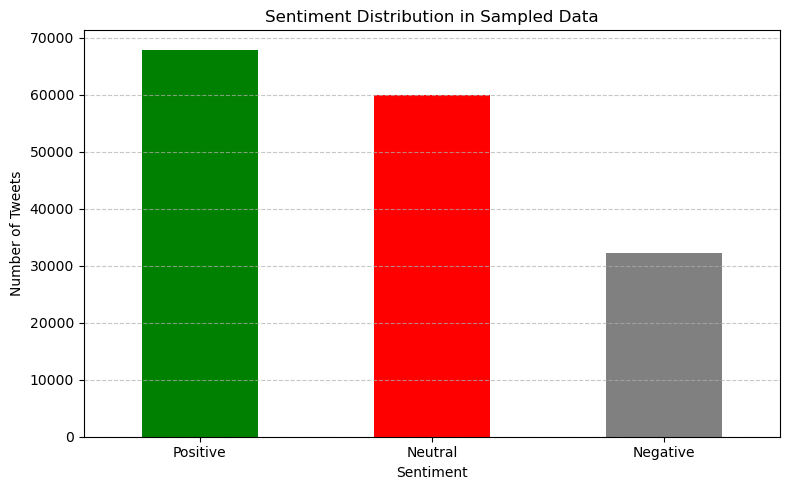

In [23]:
sentiment_counts = df_sample['sentiment'].value_counts()
plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Sentiment Distribution in Sampled Data')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()